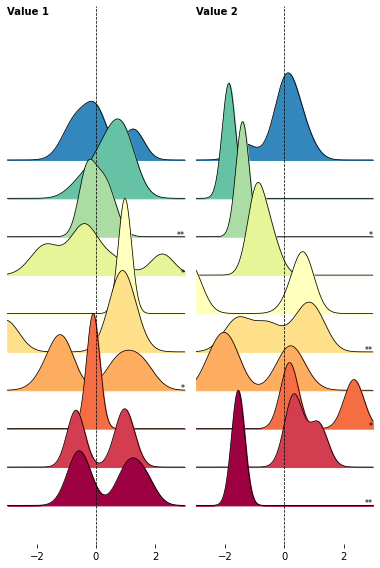

In [8]:
# ----------------------------------------------------------------------------
# Title:   Scientific Visualisation - Python & Matplotlib
# Author:  Nicolas P. Rougier
# License: BSD
# ----------------------------------------------------------------------------
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Some nice but random curves
def curve():
    n = np.random.randint(1, 5)
    centers = np.random.normal(0.0, 1.0, n)
    widths = np.random.uniform(5.0, 10.0, n)
    widths = 10 * widths / widths.sum()
    scales = np.random.uniform(0.1, 1.0, n)
    scales /= scales.sum()
    X = np.zeros(500)
    x = np.linspace(-3, 3, len(X))
    for center, width, scale in zip(centers, widths, scales):
        X = X + scale * np.exp(-(x - center) * (x - center) * width)
    return X


np.random.seed(123)
cmap = mpl.cm.get_cmap("Spectral")
fig = plt.figure(figsize=(8, 8))


ax = None
for n in range(2):
    ax = plt.subplot(1, 3, n + 1, frameon=False, sharex=ax)
    for i in range(10):
        Y = curve()
        X = np.linspace(-3, 3, len(Y))
        ax.plot(X, 3 * Y + i, color="k", linewidth=0.75, zorder=100 - i)
        color = cmap(i / 10)
        ax.fill_between(X, 3 * Y + i, i, color=color, zorder=100 - i)

        # Some random text on the right of the curve
        v = np.random.uniform(0, 1)
        if v < 0.4:
            text = "*"
            if v < 0.05:
                text = "***"
            elif v < 0.2:
                text = "**"
            ax.text(
                3.0,
                i,
                text,
                ha="right",
                va="baseline",
                size=8,
                transform=ax.transData,
                zorder=300,
            )

    ax.yaxis.set_tick_params(tick1On=False)
    ax.set_xlim(-3, 3)
    ax.set_ylim(-1, 13)
    ax.axvline(0.0, ls="--", lw=0.75, color="black", zorder=250)
    ax.text(
        0.0,
        1.0,
        "Value %d" % (n + 1),
        ha="left",
        va="top",
        weight="bold",
        transform=ax.transAxes,
    )

    if n == 0:
        ax.yaxis.set_tick_params(labelleft=True)
        ax.set_yticks(np.arange(10))
        ax.set_yticklabels(["Serie %d" % i for i in range(1, 1)])
        for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(6)
            tick.label.set_verticalalignment("bottom")
    else:
        ax.yaxis.set_tick_params(labelleft=False)


plt.tight_layout()
#plt.savefig("../../figures/anatomy/zorder-plots.png", dpi=600)
#plt.savefig("../../figures/anatomy/zorder-plots.pdf")
plt.show()